### Funções gerais - São utilizadas em mais de uma seção 

Importando as bibliotecas que serão utilizadas ao longo das células

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import scipy 
import random

Funções a serem utilizadas ao longo das celulas

In [2]:
def plot_grafo(G, titulo="Grafo"):
    '''
    Plota um grafo com rótulos de nós e pesos de arestas (se possuir).

    Esta função cria uma visualização de um grafo, exibindo os nós e arestas 
    com os pesos das arestas, se presentes. A disposição dos nós é feita com o layout "spring" 
    do NetworkX.

    Parâmetros:
    -----------
    G : networkx.DiGraph
        O grafo direcionado a ser plotado.
    
    titulo : str, opcional (default="Grafo")
        O título do gráfico exibido.

    Retorno:
    --------
    None
        A função apenas exibe o gráfico do grafo e não retorna nenhum valor.
    '''

    pos = nx.spring_layout(G)

    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edgecolors='black', arrows=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(titulo)
    plt.show()

def gerador_de_grafo(n=10, k=4, p=0.5, seed=42):
    '''
    Gera um grafo não direcionado usando o modelo Watts-Strogatz.

    Esta função cria um grafo pequeno-mundo baseado no modelo Watts-Strogatz, 
    onde os nós são conectados em uma rede com alto grau de agrupamento e um caminho médio pequeno.

    Parâmetros:
    -----------
    n : int, opcional (default=10)
        O número de nós no grafo.
    
    k : int, opcional (default=4)
        O número de vizinhos conectados inicialmente a cada nó. Deve ser menor que `n`.
    
    p : float, opcional (default=0.5)
        A probabilidade de reconectar uma aresta, introduzindo atalhos na rede.
    
    seed : int, opcional (default=42)
        A semente para o gerador de números aleatórios, garantindo reprodutibilidade nos resultados.

    Retorno:
    --------
    Graph : networkx.Graph
        Um grafo não direcionado gerado pelo algoritmo Watts-Strogatz.
    '''

    return nx.connected_watts_strogatz_graph(n=n,k=k,p=p,seed=seed)

def adicionar_pesos_ao_grafo(G, custo_min_aresta=1, custo_max_aresta=5):
    '''
    Adiciona pesos aleatórios às arestas de um grafo.

    Esta função transforma um grafo não direcionado em um grafo direcionado, 
    atribuindo pesos aleatórios a cada aresta, que são gerados dentro de um intervalo 
    especificado.

    Parâmetros:
    -----------
    G : networkx.Graph
        O grafo não direcionado ao qual os pesos serão adicionados.
    
    custo_min_aresta : int, opcional (default=1)
        O valor mínimo do peso de uma aresta.
    
    custo_max_aresta : int, opcional (default=5)
        O valor máximo do peso de uma aresta.

    Retorno:
    --------
    DiGraph : networkx.DiGraph
        Um grafo direcionado onde as arestas possuem pesos aleatórios 
        dentro do intervalo especificado.
    '''

    array = nx.adjacency_matrix(G)
    n = array.shape[0]
    for i in range(n): 
        for j in range(n):
            if array[i,j]: 
                array[i,j] = array[i,j]*random.randint(custo_min_aresta, custo_max_aresta)

    return nx.DiGraph(pd.DataFrame(array))

### 1. Gerando grafos simples e conexos com n=10, n=50 e n=100 (n corresponde ao numero de vétices) 

Gerando cada grafo para n=10, n=50 e n=100

In [3]:
GRAFOS_GERADOS = [
    gerador_de_grafo(n=10), 
    gerador_de_grafo(n=50), 
    gerador_de_grafo(n=100)
]

Exibindo cada grafo gerado

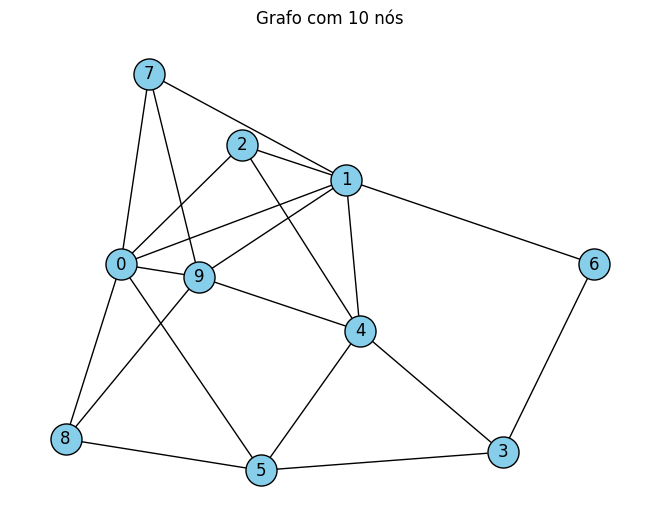

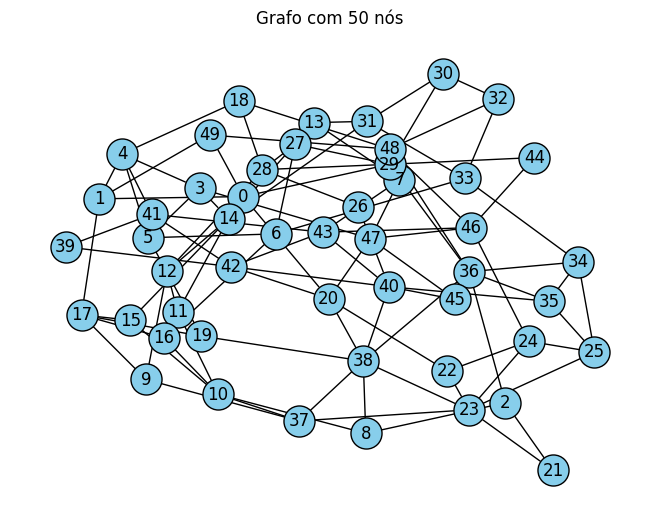

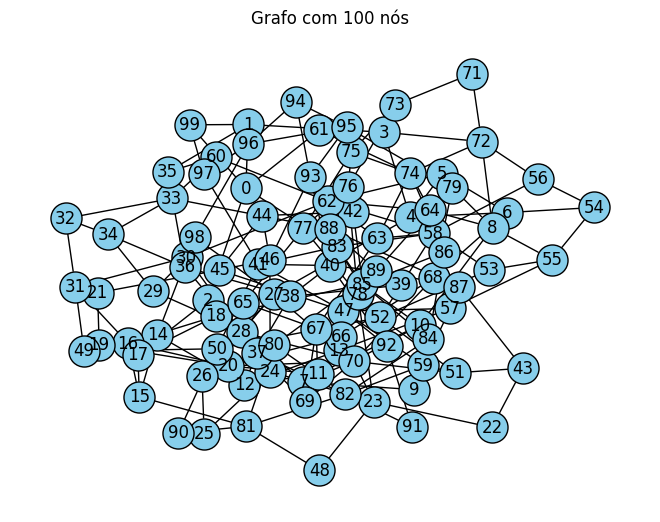

In [4]:
for GRAFO in GRAFOS_GERADOS:
    plot_grafo(GRAFO, f'Grafo com {len(GRAFO.nodes)} nós')

### 2. Gerando a matriz de adjacencia dos grafos 

Obtendo a matriz adjacente de cada grafo

In [5]:
adj_matrixes = [nx.adjacency_matrix(GRAFO) for GRAFO in GRAFOS_GERADOS]

Exibindo elas 

In [6]:
for adj_matrix in adj_matrixes:
    print(f"Exibindo a matriz de adjacencia para n={adj_matrix.shape[0]}")
    display(pd.DataFrame(adj_matrix))

Exibindo a matriz de adjacencia para n=10


,0,1,2,3,4,5,6,7,8,9
0,0,1,1,0,0,1,0,1,1,1
1,1,0,1,0,1,0,1,1,0,1
2,1,1,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0
4,0,1,1,1,0,1,0,0,0,1
5,1,0,0,1,1,0,0,0,1,0
6,0,1,0,1,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,1
8,1,0,0,0,0,1,0,0,0,1
9,1,1,0,0,1,0,0,1,1,0


Exibindo a matriz de adjacencia para n=50


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exibindo a matriz de adjacencia para n=100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 3. Gerar aleatoriamente a matriz de custo, com entradas de números inteiros, das arestas pertencentes a [1,5]

Agora iremos adicionar custos de 1 a 5 as arestas do grafo

In [7]:
grafos_com_pesos = [adicionar_pesos_ao_grafo(GRAFO,custo_min_aresta=1,custo_max_aresta=5) for GRAFO in GRAFOS_GERADOS]

Construindo as matrizes de custos

In [8]:
def gerar_matriz_de_custo(G):
    # Obter o número de nós no grafo
    n = G.number_of_nodes()
    
    # Inicializar uma matriz n x n com valores infinitos (sem ligação entre os nós)
    matriz_custo = np.full((n, n), np.inf)
    
    # Preencher a matriz com os pesos das arestas
    for (u, v, dados) in G.edges(data=True):
        matriz_custo[u, v] = dados.get('weight', 1)  # Se não houver peso, usar o padrão 1
    
    return matriz_custo

matrizes_de_custos = [gerar_matriz_de_custo(grafo_com_peso) for grafo_com_peso in grafos_com_pesos]

Exibindo as matrizes:

In [9]:
for matriz_de_custo in matrizes_de_custos:
    print(f"Exibindo a matriz de custo para n={matriz_de_custo.shape[0]}")
    display(pd.DataFrame(matriz_de_custo))

Exibindo a matriz de custo para n=10


,0,1,2,3,4,5,6,7,8,9
0,inf,2.0,2.0,inf,inf,5.0,inf,3.0,1.0,2.0
1,2.0,inf,4.0,inf,2.0,inf,4.0,4.0,inf,3.0
2,5.0,3.0,inf,inf,3.0,inf,inf,inf,inf,inf
3,inf,inf,inf,inf,1.0,3.0,5.0,inf,inf,inf
4,inf,4.0,2.0,4.0,inf,4.0,inf,inf,inf,4.0
5,1.0,inf,inf,3.0,3.0,inf,inf,inf,2.0,inf
6,inf,2.0,inf,4.0,inf,inf,inf,inf,inf,inf
7,3.0,1.0,inf,inf,inf,inf,inf,inf,inf,3.0
8,5.0,inf,inf,inf,inf,5.0,inf,inf,inf,3.0
9,3.0,1.0,inf,inf,5.0,inf,inf,5.0,4.0,inf


Exibindo a matriz de custo para n=50


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,inf,5.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,5.0
1,4.0,inf,inf,inf,2.0,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,3.0
2,inf,inf,inf,inf,inf,inf,inf,inf,1.0,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,inf,inf,inf,inf,3.0,1.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,3.0,inf,inf
4,inf,1.0,inf,3.0,inf,1.0,inf,inf,inf,inf,...,inf,2.0,inf,inf,inf,inf,inf,inf,inf,inf
5,inf,inf,inf,2.0,3.0,inf,2.0,inf,inf,inf,...,inf,4.0,inf,inf,inf,inf,inf,inf,inf,inf
6,inf,inf,inf,inf,inf,2.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
7,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,5.0,inf,inf,inf,2.0,inf,inf
8,inf,inf,2.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
9,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


Exibindo a matriz de custo para n=100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,inf,5.0,3.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,3.0
1,2.0,inf,inf,4.0,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.0
2,2.0,inf,inf,inf,inf,inf,inf,5.0,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,inf,1.0,inf,inf,4.0,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,inf,inf,inf,4.0,inf,5.0,2.0,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,4.0,4.0,inf,5.0,inf,inf,inf
96,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,3.0,3.0,inf,1.0,1.0,inf
97,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,1.0,inf,inf,2.0
98,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,1.0,inf,inf,inf


### 4. Implementar os algoritmos em grafos 

Por fim, vamos aplicar o método de Floyd-Warshall para encontrar os menores caminhos possiveis entre cada vertice

IMPLEMENTAÇÃO SEGUINDO O PSEUDOCÓDIGO:

```plaintext
função floyd_warshall(grafo):
    # Número de vértices no grafo
    n = comprimento(grafo)

    # Inicializa a matriz de distâncias
    dist = matriz(n, n, ∞)  # Cria uma matriz n x n preenchida com ∞

    # Define a distância de cada vértice para si mesmo como 0
    para cada vértice i de 0 a n-1:
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    para cada vértice i de 0 a n-1:
        para cada vértice j de 0 a n-1:
            se grafo[i][j] ≠ 0:
                dist[i][j] = grafo[i][j]

    # Algoritmo de Floyd-Warshall
    para cada vértice k de 0 a n-1:
        para cada vértice i de 0 a n-1:
            para cada vértice j de 0 a n-1:
                # Atualiza a distância mínima
                dist[i][j] = mínimo(dist[i][j], dist[i][k] + dist[k][j])

    retornar dist


In [10]:
def floyd_warshall(G):

    graph = pd.DataFrame(nx.adjacency_matrix(G)).values

    # Número de vértices no grafo
    n = len(graph)
    
    # Inicializa a matriz de distâncias
    dist = [[float('inf')] * n for _ in range(n)]
    
    # Define a distância de cada vértice para si mesmo como 0
    for i in range(n):
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    for i in range(n):
        for j in range(n):
            if graph[i][j] != 0:
                dist[i][j] = graph[i][j]

    # Algoritmo de Floyd-Warshall
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Atualiza a distância mínima
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

Definiremos tambem uma função que ira exibir o menor custo de um vértice para outro

In [11]:
def print_menor_custo_caminho(results, vertice_origem=None, vertice_destino=None):
    try: 
        if vertice_origem is None and  vertice_destino is None:
            vertice_origem = int(input('Digite o vértice de origem: '))
            vertice_destino = int(input('Digite o vértice de destino: '))
        print(f'O menor caminho do vertice {vertice_origem} para o vertice {vertice_destino} é de custo = {results[vertice_origem][vertice_destino]}')
    except:
        print('Não foi possível printar o menor caminho entre dois vertices, pois nao foram definidos os vertices')

### 5. Analisar a complexidade do algoritmo

### 6. Fazer interfaces mostrando:


### 7. Estudo a cerca do grafo do artigo selecionado

Construindo a matriz de adjacencia a partir do grafo do artigo

In [12]:
# Número de vértices no grafo (nós de 1 a 15)
num_vertices = 15

# Inicializando a matriz de adjacência com zeros (sem arestas inicialmente)
adj_matrix = np.zeros((num_vertices, num_vertices))

# Definindo as arestas conforme a imagem (baseado nos pesos fornecidos)
vertices = [
    (1,  2,  170), 
    (1,  3,  16), 
    (1,  4,  25),
    (2,  3,  50),
    (3,  4,  40), 
    (3,  6,  60),
    (4,  5,  40),
    (5,  6,  60), 
    (5,  11, 20),
    (6,  7,  60), 
    (6,  10, 80),
    (7,  8,  80),
    (8,  9,  70),
    (9,  10, 80), 
    (9,  13, 70),
    (10, 12, 120),
    (11, 12, 30),
    (12, 14, 120),
    (13, 15, 70), 
    (14, 15, 70)
]

# Preenchendo a matriz com os pesos das arestas
for vertice in vertices:
    u, v, peso = vertice
    adj_matrix[u-1, v-1] = peso  # Subtraímos 1 pois os índices de matriz começam em 0
    adj_matrix[v-1, u-1] = peso  # A matriz é simétrica para um grafo não direcionado

Transformando em pd.Dataframe e salvando a matriz de adjacencia em .csv

In [13]:
df = pd.DataFrame(adj_matrix)
df.to_csv('artigo_de_estudo/matriz_adjacente.csv')

display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,170.0,16.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,170.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,50.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,0.0,40.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
5,0.0,0.0,60.0,0.0,60.0,0.0,60.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,60.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,80.0,0.0,0.0,70.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,80.0,0.0,0.0,120.0,0.0,0.0,0.0


O tipo de dados que iremos trabalhar no NetworkX é o `DiGraph`.

In [14]:
G = nx.DiGraph(df)

Para realizar a plotagem do grafo usaremos a função `plot_grafo()`

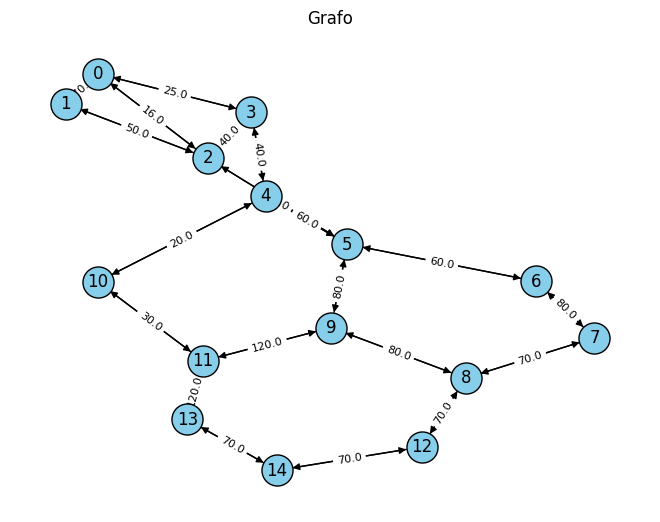

In [15]:
plot_grafo(G)

Aplicando floyd-warshall em G e exemplificando o custo para 0 a 1

In [16]:
results = floyd_warshall(G)
print_menor_custo_caminho(results, vertice_origem=0, vertice_destino=1)

O menor caminho do vertice 0 para o vertice 1 é de custo = 66.0
